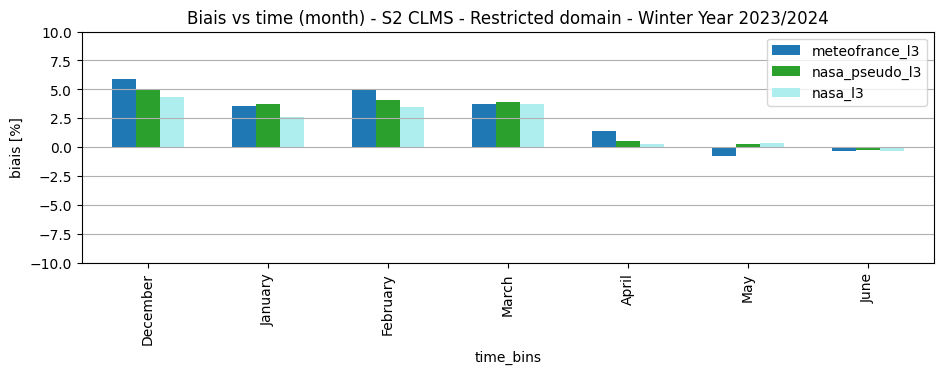

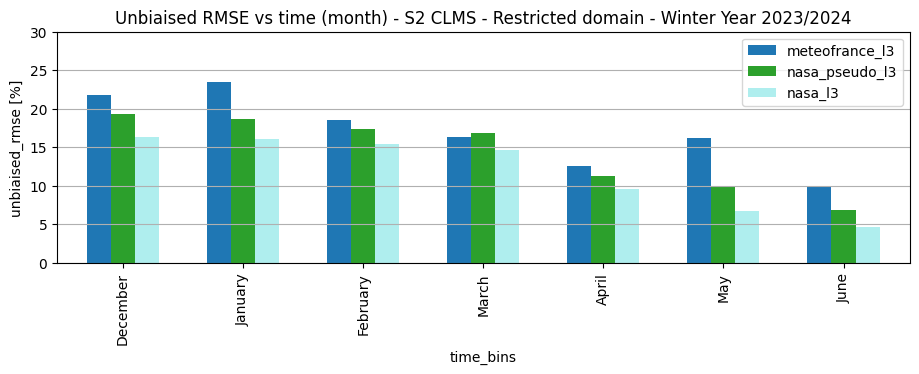

In [ ]:
import xarray as xr
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME

from reductions.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from postprocess.error_distribution import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

# Forests are not accounted for as Météo-France doesn't have a quantitative estimation on forests
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
analyses_dict_v3 = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

# In version 3 altitude bins are right edge of altitude range
selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}

wy = WinterYear(2023,2024)
wy.select_months(['december', 'january','february', 'march', 'april', 'may', 'june'])
biais_barplots(postprocess_uncertainty_analysis(selection_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='time (month)', title_complement=f"S2 CLMS - Restricted domain - {str(wy)}")
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(selection_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name="time (month)", title_complement=f"S2 CLMS - Restricted domain - {str(wy)}")

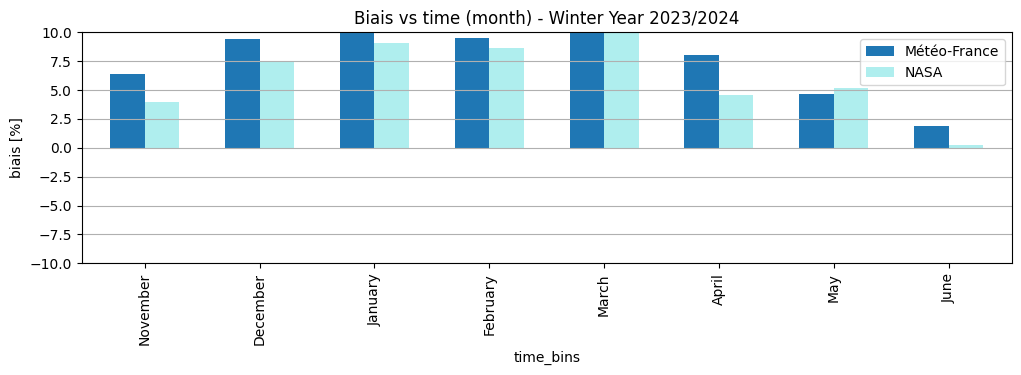

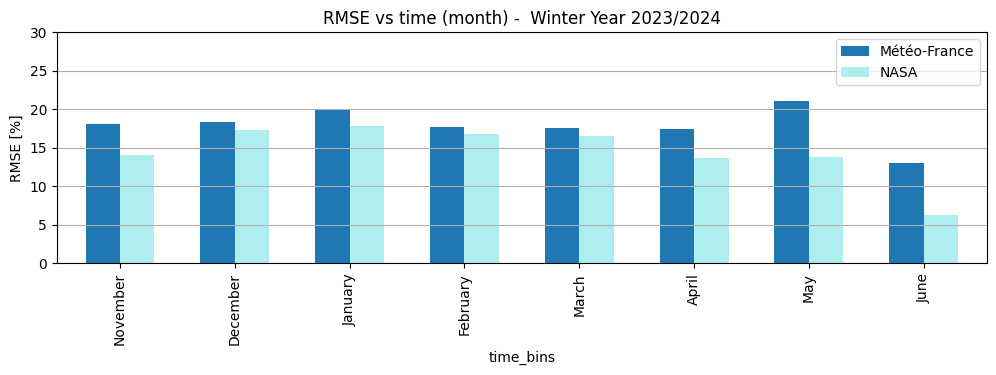

In [1]:
import xarray as xr
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME, PRODUCT_PLOT_NAMES

from reductions.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from postprocess.error_distribution import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots, rmse_barplots

# Forests are not accounted for as Météo-France doesn't have a quantitative estimation on forests
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
analyses_dict_v3 = {METEOFRANCE_VAR_NAME: mf_metrics_ds,  NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

# In version 3 altitude bins are right edge of altitude range
selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}

wy = WinterYear(2023,2024)
wy.select_months(['november', 'december', 'january','february', 'march', 'april', 'may', 'june'])
# Altitude > 1500m - no forest 
biais_barplots(postprocess_uncertainty_analysis(selection_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='time (month)', title_complement=f"{str(wy)}")
rmse_barplots(postprocess_uncertainty_analysis(selection_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name="time (month)", title_complement=f" {str(wy)}")

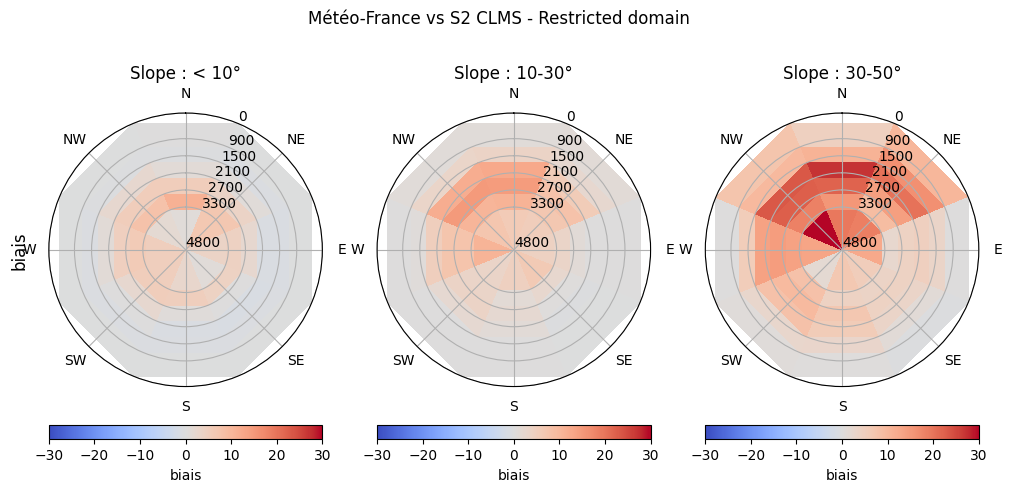

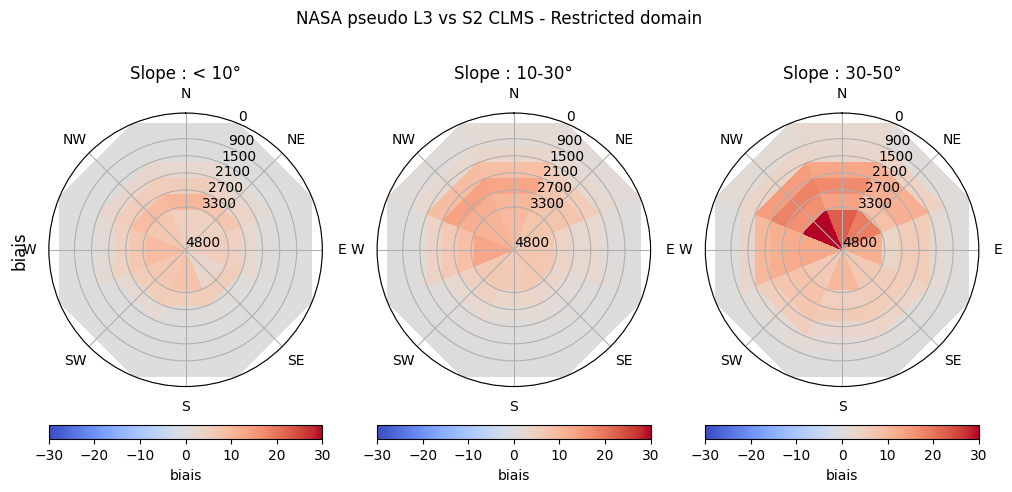

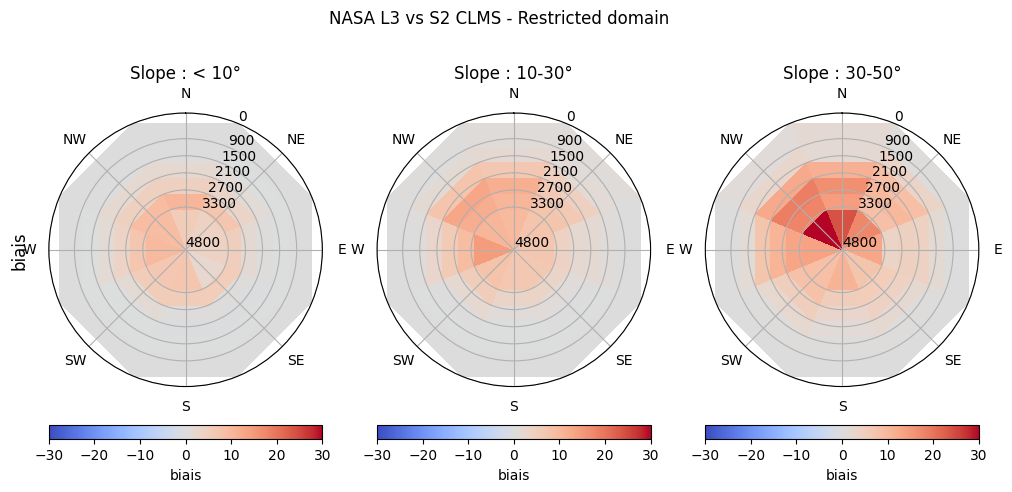

In [2]:
# Semi distirbuted analysis

# version 3 --> metrics wrt CLMS product
# version 4 --> metrics wrt Theia product
from postprocess.error_distribution import semidistributed_geometry_plot

# Version 3
selection_dict = {k: v.sel(time=slice('2023-12','2024-06')) for k,v in analyses_dict_v3.items()}
semidistributed_geometry_plot(selection_dict, 'biais', title_complement=" vs S2 CLMS - Restricted domain")

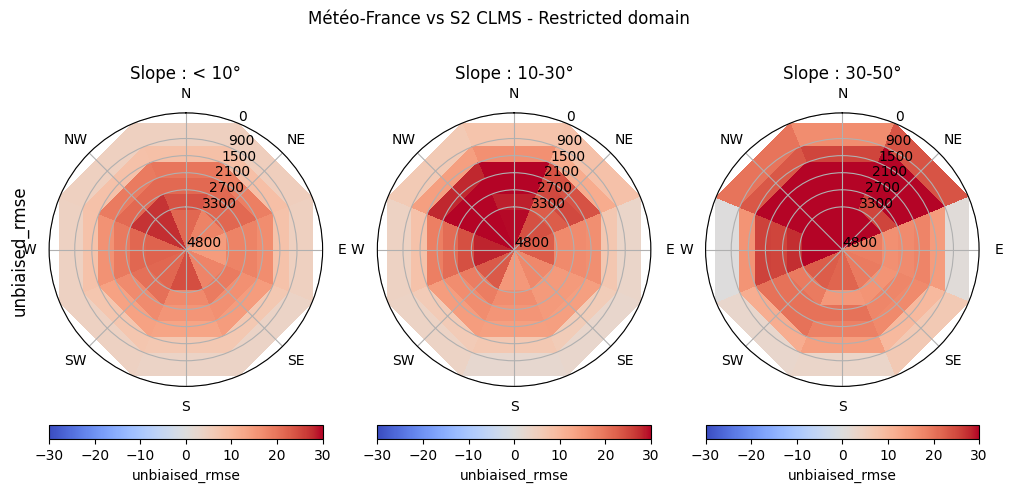

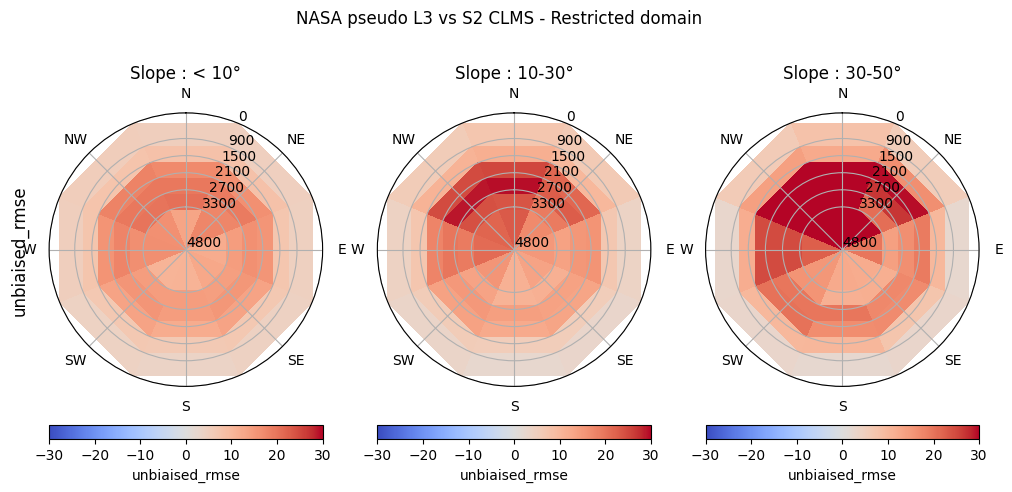

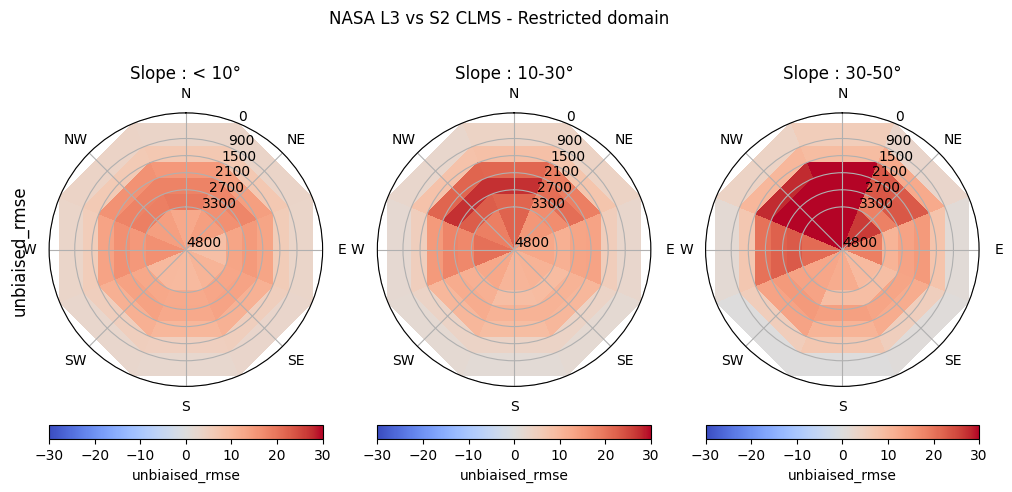

In [3]:
# Version 3
selection_dict = {k: v.sel(time=slice('2023-12','2024-06')) for k,v in analyses_dict_v3.items()}
semidistributed_geometry_plot(selection_dict, 'unbiaised_rmse', title_complement=" vs S2 CLMS - Restricted domain")

In [4]:
# Version 4
import numpy as np
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
analyses_dict_v4 = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}


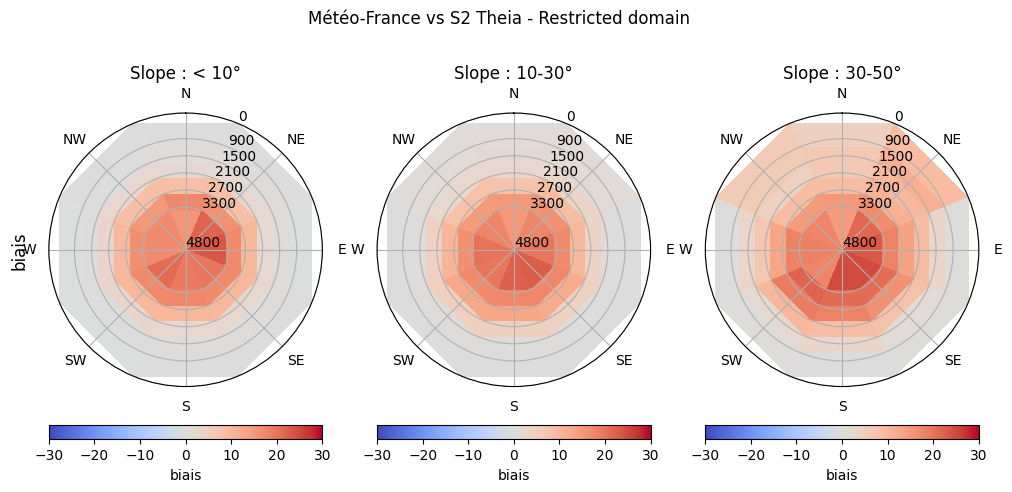

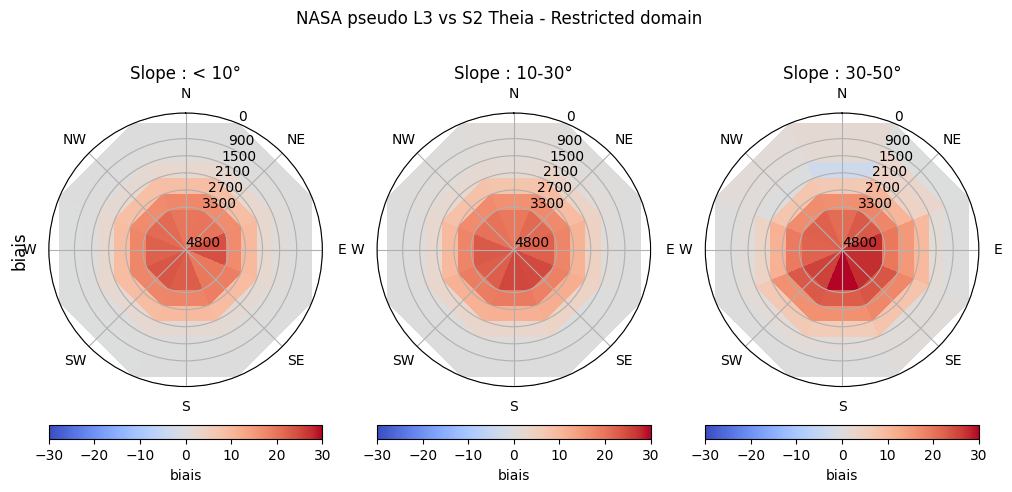

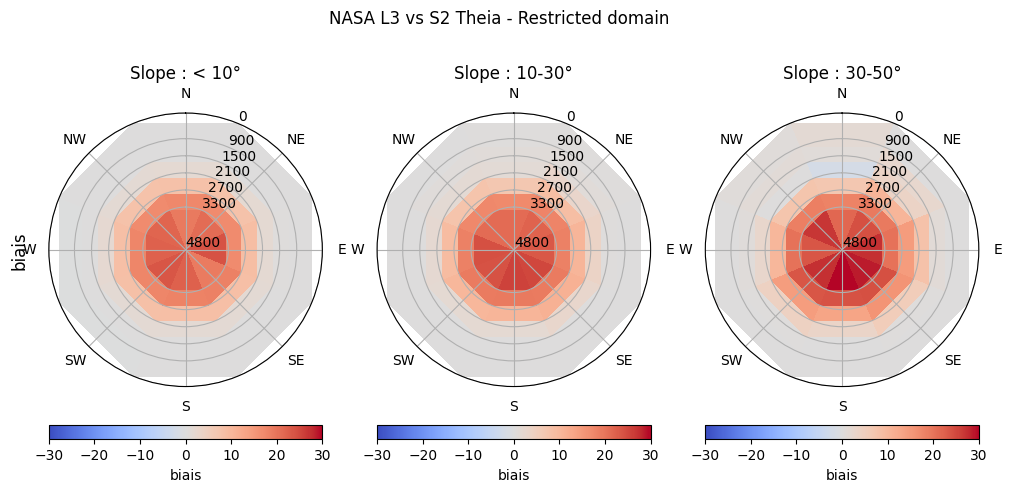

In [5]:

selection_dict = {k: v.sel(time=slice('2023-12','2024-06')) for k,v in analyses_dict_v4.items()}
semidistributed_geometry_plot(selection_dict, 'biais', title_complement=" vs S2 Theia - Restricted domain", altitude_ticks=np.array([*mf_metrics_ds.altitude_bins, 4800]))

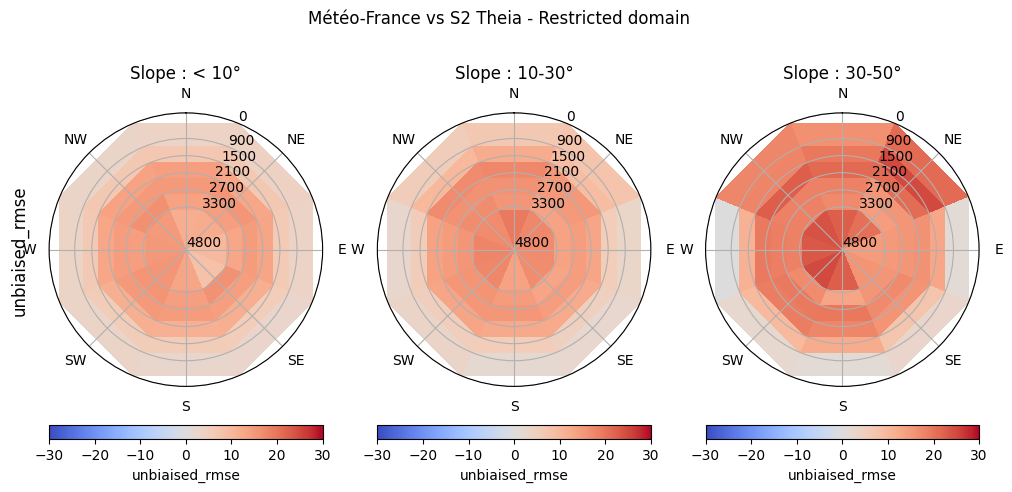

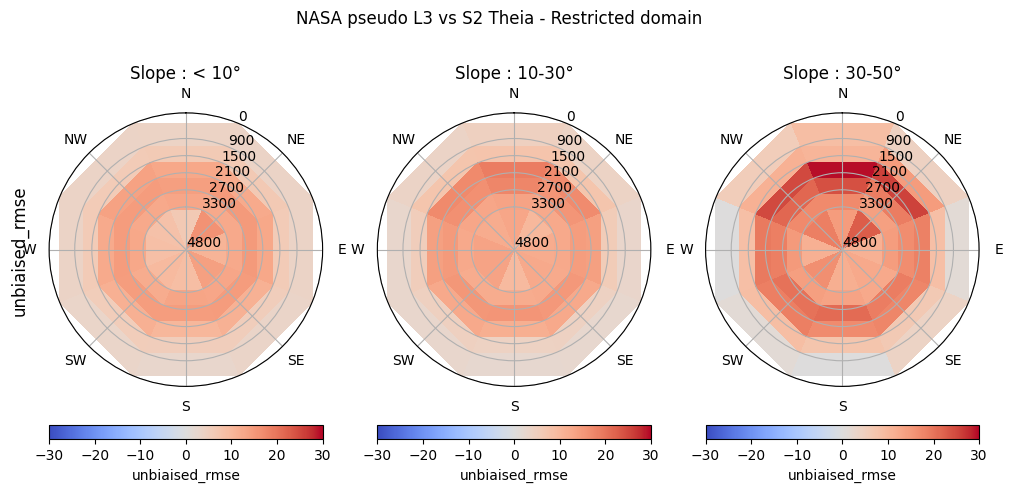

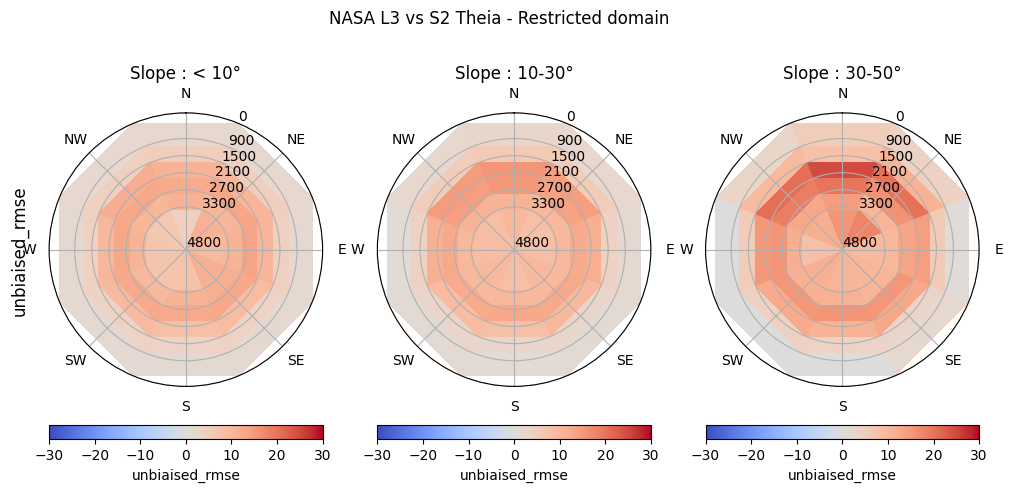

In [6]:
selection_dict = {k: v.sel(time=slice('2023-12','2024-06')) for k,v in analyses_dict_v4.items()}
semidistributed_geometry_plot(selection_dict, 'unbiaised_rmse', title_complement=" vs S2 Theia - Restricted domain", altitude_ticks=np.array([*mf_metrics_ds.altitude_bins, 4800]))

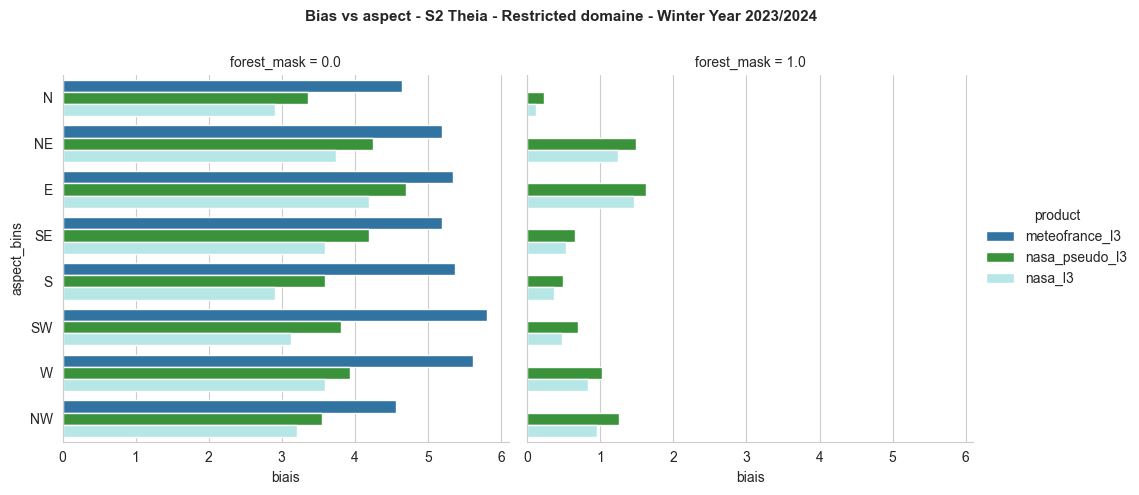

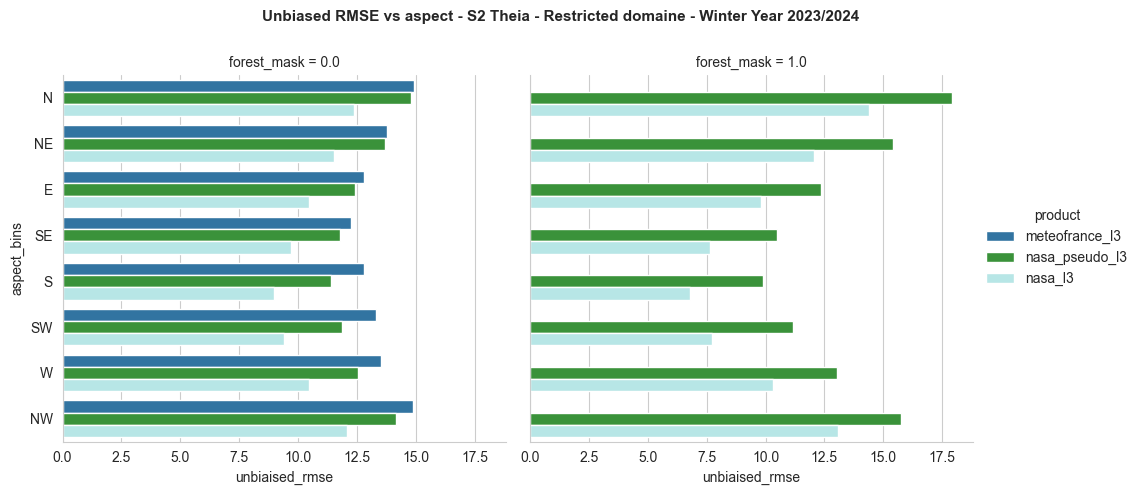

In [7]:
import pandas as pd
import seaborn as sns
from postprocess.error_distribution import postprocess_uncertainty_analysis
from reductions.statistics_base import EvaluationVsHighResBase
from products.plot_settings import PRODUCT_PLOT_COLORS
import xarray as xr
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
from winter_year import WinterYear

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)

wy = WinterYear(2023,2024)
wy.select_months(['december', 'january','february', 'march', 'april', 'may', 'june'])

analyses_dict_v4_with_forest = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}
selection_dict = {k: v.sel(time=slice('2023-12','2024-06')).sel(altitude_bins=slice(900,None)) for k,v in analyses_dict_v4_with_forest.items()}
# This line is to prevent alphabetical ordering of aspects when passing in pandas
selection_dict = {k: v.assign_coords({'aspect_bins':pd.CategoricalIndex(data=EvaluationVsHighResBase.aspect_bins().labels, categories=EvaluationVsHighResBase.aspect_bins().labels, ordered=True)}) for k,v in selection_dict.items()}

reduced_ds=postprocess_uncertainty_analysis(uncertainty_datasets=selection_dict, analysis_var=['forest_mask', 'aspect_bins'])
reduced_df = reduced_ds.to_dataframe()
sns.set_style('whitegrid')
plot_biais = sns.catplot(reduced_df,x='biais', y='aspect_bins',hue='product',col='forest_mask', kind='bar',col_wrap = 2,orient = 'h', palette=list(PRODUCT_PLOT_COLORS.values()))
plot_rmse = sns.catplot(reduced_df,x='unbiaised_rmse', y='aspect_bins',hue='product',col='forest_mask', kind='bar',col_wrap = 2,orient = 'h', palette=list(PRODUCT_PLOT_COLORS.values()))
plot_biais.figure.suptitle(f"Bias vs aspect - S2 Theia - Restricted domaine - {str(wy)}", fontsize=11, fontweight="bold")
plot_biais.figure.subplots_adjust(top=0.85)
plot_rmse.figure.suptitle(f"Unbiased RMSE vs aspect - S2 Theia - Restricted domaine - {str(wy)}", fontsize=11, fontweight="bold")
plot_rmse.figure.subplots_adjust(top=0.85)

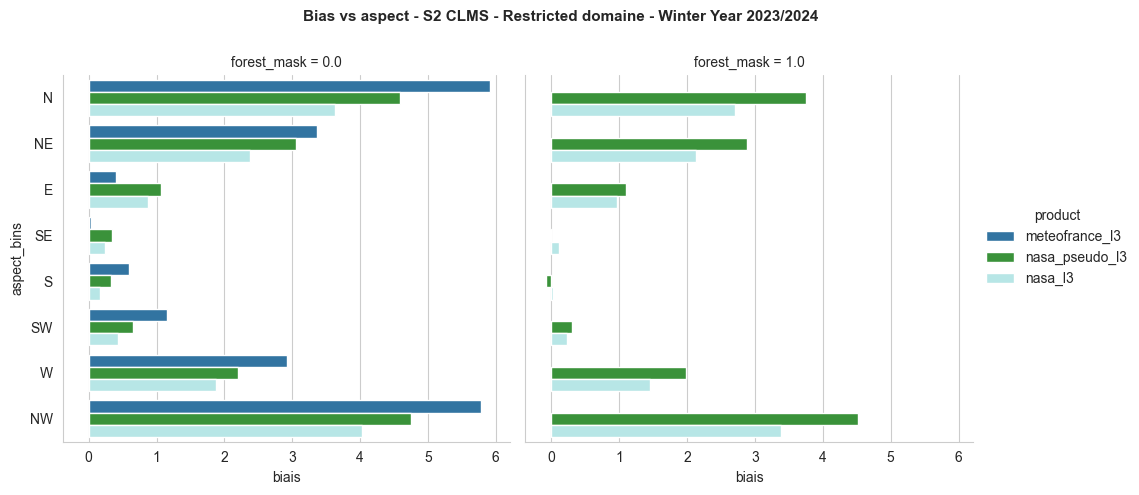

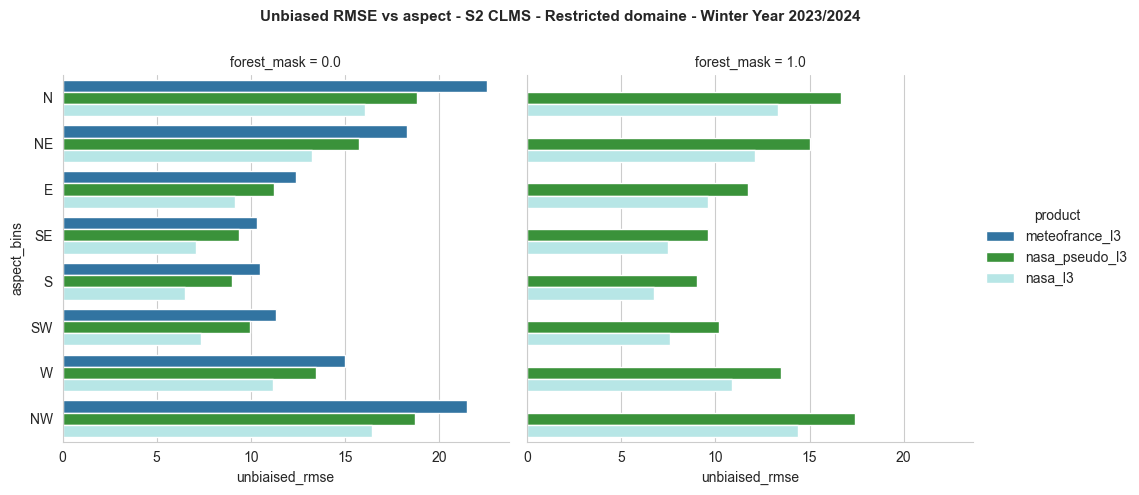

In [8]:
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
wy = WinterYear(2023,2024)

analyses_dict_v3_with_forest = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}
selection_dict = {k: v.sel(time=slice('2023-12','2024-06')).sel(altitude_bins=slice(900,None)) for k,v in analyses_dict_v3_with_forest.items()}
# This line is to prevent alphabetical ordering of aspects when passing in pandas
selection_dict = {k: v.assign_coords({'aspect_bins':pd.CategoricalIndex(data=EvaluationVsHighResBase.aspect_bins().labels, categories=EvaluationVsHighResBase.aspect_bins().labels, ordered=True)}) for k,v in selection_dict.items()}

reduced_ds=postprocess_uncertainty_analysis(uncertainty_datasets=selection_dict, analysis_var=['forest_mask', 'aspect_bins'])
reduced_df = reduced_ds.to_dataframe()
sns.set_style('whitegrid')
plot_biais = sns.catplot(reduced_df,x='biais', y='aspect_bins',hue='product',col='forest_mask', kind='bar',col_wrap = 2,orient = 'h', palette=list(PRODUCT_PLOT_COLORS.values()))
plot_rmse = sns.catplot(reduced_df,x='unbiaised_rmse', y='aspect_bins',hue='product',col='forest_mask', kind='bar',col_wrap = 2,orient = 'h', palette=list(PRODUCT_PLOT_COLORS.values()))
plot_biais.figure.suptitle(f"Bias vs aspect - S2 CLMS - Restricted domaine - {str(wy)}", fontsize=11, fontweight="bold")
plot_biais.figure.subplots_adjust(top=0.85)
plot_rmse.figure.suptitle(f"Unbiased RMSE vs aspect - S2 CLMS - Restricted domaine - {str(wy)}", fontsize=11, fontweight="bold")
plot_rmse.figure.subplots_adjust(top=0.85)

/tmp/ipykernel_46975/2808543562.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot_biais = sns.catplot(reduced_df,x='biais', y='sensor_zenith_bins',hue='product',col='forest_mask', kind='bar',col_wrap = 2,orient = 'h', palette=list(PRODUCT_PLOT_COLORS.values()))
/tmp/ipykernel_46975/2808543562.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot_rmse = sns.catplot(reduced_df,x='unbiaised_rmse', y='sensor_zenith_bins',hue='product',col='forest_mask', kind='bar',col_wrap = 2,orient = 'h', palette=list(PRODUCT_PLOT_COLORS.values()))


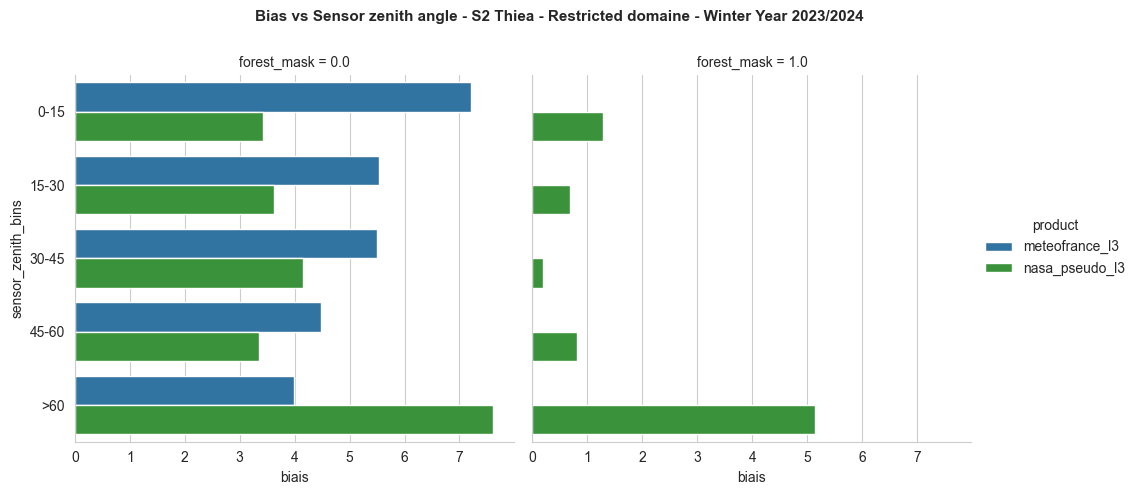

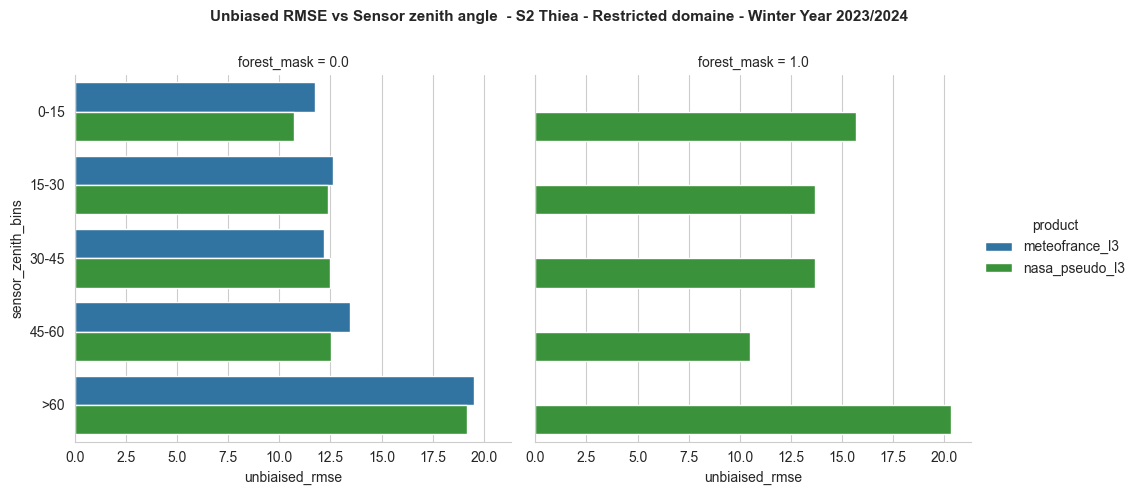

In [9]:
selection_dict = {k: v.sel(time=slice('2023-12','2024-06')).sel(altitude_bins=slice(900,None)) for k,v in analyses_dict_v4_with_forest.items()}
selection_dict.pop('nasa_l3')
selection_dict = {k: v.sel(sensor_zenith_bins=slice(None, 75)).assign_coords({'sensor_zenith_bins': ['0-15', '15-30', '30-45', '45-60', '>60']}) for k,v in selection_dict.items()}
reduced_ds=postprocess_uncertainty_analysis(uncertainty_datasets=selection_dict, analysis_var=['forest_mask', 'sensor_zenith_bins'])
reduced_df = reduced_ds.to_dataframe()

sns.set_style('whitegrid')
plot_biais = sns.catplot(reduced_df,x='biais', y='sensor_zenith_bins',hue='product',col='forest_mask', kind='bar',col_wrap = 2,orient = 'h', palette=list(PRODUCT_PLOT_COLORS.values()))
plot_rmse = sns.catplot(reduced_df,x='unbiaised_rmse', y='sensor_zenith_bins',hue='product',col='forest_mask', kind='bar',col_wrap = 2,orient = 'h', palette=list(PRODUCT_PLOT_COLORS.values()))
plot_biais.figure.suptitle(f"Bias vs Sensor zenith angle - S2 Thiea - Restricted domaine - {str(wy)}", fontsize=11, fontweight="bold")
plot_biais.figure.subplots_adjust(top=0.85)
plot_rmse.figure.suptitle(f"Unbiased RMSE vs Sensor zenith angle  - S2 Thiea - Restricted domaine - {str(wy)}", fontsize=11, fontweight="bold")
plot_rmse.figure.subplots_adjust(top=0.85)

/tmp/ipykernel_46975/3759409838.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0-15', '15-30', '30-45', '45-60','>60' ])


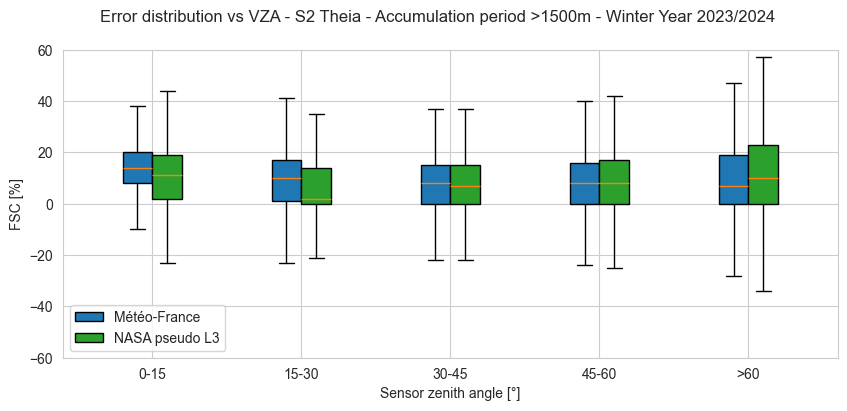

In [10]:
import xarray as xr
from matplotlib import pyplot as plt

from winter_year import WinterYear
from postprocess.error_distribution import raw_error_boxplots
from products.plot_settings import METEOFRANCE_VAR_NAME, NASA_L3_VAR_NAME, NASA_PSEUDO_L3_VAR_NAME

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-02')).sel(forest_mask=0).sel(altitude_bins=slice(1500,None)).sel(sensor_zenith_bins=slice(None, 90))
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-04')).sel(forest_mask=0).sel(altitude_bins=slice(1500,None)).sel(sensor_zenith_bins=slice(None, 90))
wy = WinterYear(2023,2024)

analyses_dict_v4_vza = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds}#, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

fig,ax = plt.subplots(figsize=(10,4))
fig.suptitle(f"Error distribution vs VZA - S2 Theia - Accumulation period >1500m - {str(wy)}")
ax.set_xticklabels(['0-15', '15-30', '30-45', '45-60','>60' ])
ax.set_xlabel('Sensor zenith angle [°]')
ax.set_ylabel('FSC [%]')
ax.set_ylim(-60,60)
ax.plot()

raw_error_boxplots(metrics_dict=analyses_dict_v4_vza, analysis_var='sensor_zenith_bins', ax=ax)

/tmp/ipykernel_46975/3759409838.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0-15', '15-30', '30-45', '45-60','>60' ])


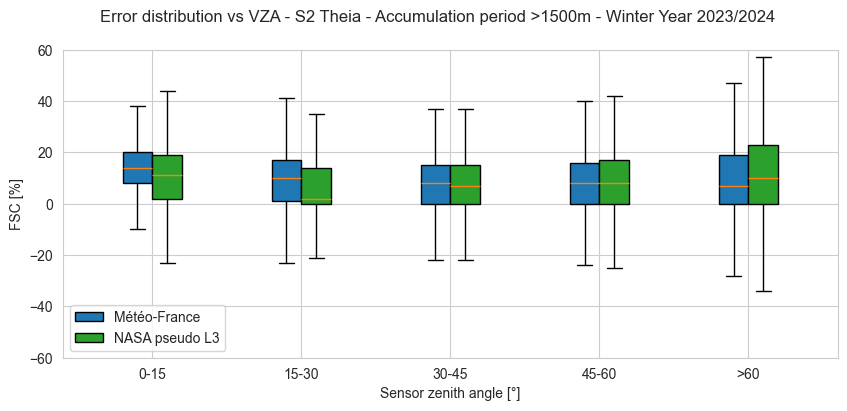

In [11]:
import xarray as xr
from matplotlib import pyplot as plt

from winter_year import WinterYear
from postprocess.error_distribution import raw_error_boxplots
from products.plot_settings import METEOFRANCE_VAR_NAME, NASA_L3_VAR_NAME, NASA_PSEUDO_L3_VAR_NAME

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-02')).sel(forest_mask=0).sel(altitude_bins=slice(1500,None)).sel(sensor_zenith_bins=slice(None, 90))
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-04')).sel(forest_mask=0).sel(altitude_bins=slice(1500,None)).sel(sensor_zenith_bins=slice(None, 90))
wy = WinterYear(2023,2024)

analyses_dict_v4_vza = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds}#, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

fig,ax = plt.subplots(figsize=(10,4))
fig.suptitle(f"Error distribution vs VZA - S2 Theia - Accumulation period >1500m - {str(wy)}")
ax.set_xticklabels(['0-15', '15-30', '30-45', '45-60','>60' ])
ax.set_xlabel('Sensor zenith angle [°]')
ax.set_ylabel('FSC [%]')
ax.set_ylim(-60,60)
ax.plot()

raw_error_boxplots(metrics_dict=analyses_dict_v4_vza, analysis_var='sensor_zenith_bins', ax=ax)

/tmp/ipykernel_46975/3621272012.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0-10', '10-30', '30-50'])


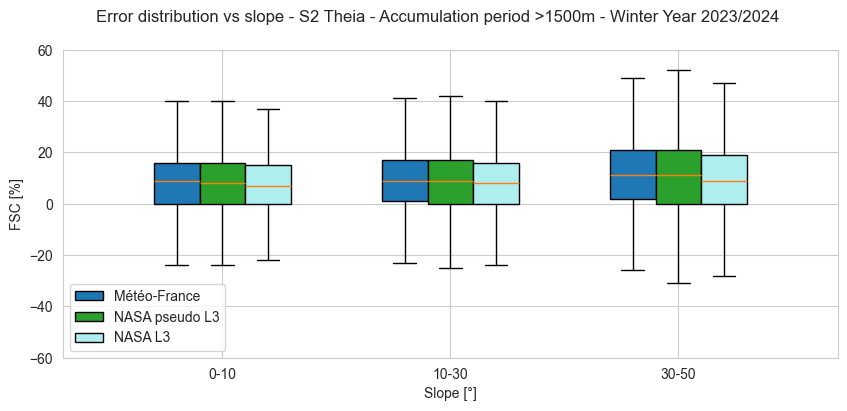

In [12]:
import xarray as xr
from matplotlib import pyplot as plt

from winter_year import WinterYear
from postprocess.error_distribution import raw_error_boxplots
from products.plot_settings import METEOFRANCE_VAR_NAME, NASA_L3_VAR_NAME, NASA_PSEUDO_L3_VAR_NAME

mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-02')).sel(forest_mask=0).sel(altitude_bins=slice(1500,None)).sel(slope_bins=slice(0,60))
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-02')).sel(forest_mask=0).sel(altitude_bins=slice(1500,None)).sel(slope_bins=slice(0,60))
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-03')).sel(forest_mask=0).sel(altitude_bins=slice(1500,None)).sel(slope_bins=slice(0,60))
wy = WinterYear(2023,2024)

analyses_dict_v4_slope = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

fig,ax = plt.subplots(figsize=(10,4))
fig.suptitle(f"Error distribution vs slope - S2 Theia - Accumulation period >1500m - {str(wy)}")
ax.set_xticklabels(['0-10', '10-30', '30-50'])
ax.set_xlabel('Slope [°]')
ax.set_ylabel('FSC [%]')
ax.set_ylim(-60,60)
ax.plot()

raw_error_boxplots(metrics_dict=analyses_dict_v4_slope, analysis_var='slope_bins', ax=ax)

/tmp/ipykernel_46975/3660264337.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0-10', '10-30', '30-50'])


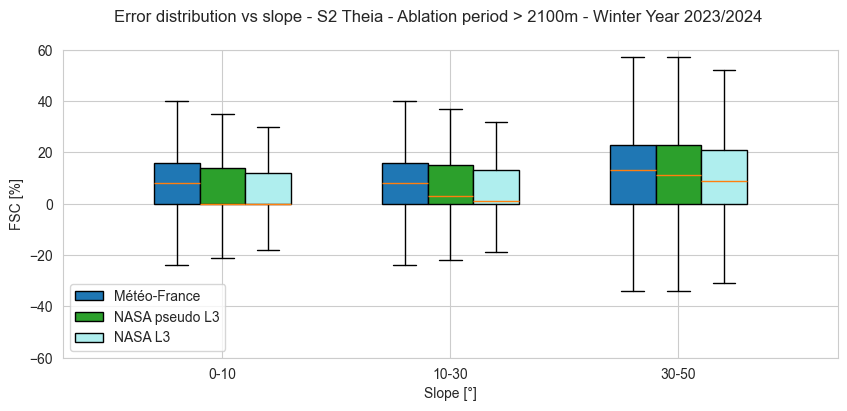

In [13]:
import xarray as xr
from matplotlib import pyplot as plt

from winter_year import WinterYear
from postprocess.error_distribution import raw_error_boxplots
from products.plot_settings import METEOFRANCE_VAR_NAME, NASA_L3_VAR_NAME, NASA_PSEUDO_L3_VAR_NAME


mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2024-03', '2024-07')).sel(forest_mask=0).sel(altitude_bins=slice(2100,None)).sel(slope_bins=slice(0,60))
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time=slice('2024-03', '2024-07')).sel(forest_mask=0).sel(altitude_bins=slice(2100,None)).sel(slope_bins=slice(0,60))
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2024-03', '2024-07')).sel(forest_mask=0).sel(altitude_bins=slice(2100,None)).sel(slope_bins=slice(0,60))
wy = WinterYear(2023,2024)

analyses_dict_v4_slope = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

fig,ax = plt.subplots(figsize=(10,4))
fig.suptitle(f"Error distribution vs slope - S2 Theia - Ablation period > 2100m - {str(wy)}")
ax.set_xticklabels(['0-10', '10-30', '30-50'])
ax.set_xlabel('Slope [°]')
ax.set_ylabel('FSC [%]')
ax.set_ylim(-60,60)
ax.plot()

raw_error_boxplots(metrics_dict=analyses_dict_v4_slope, analysis_var='slope_bins', ax=ax)

In [14]:
# General
from winter_year import WinterYear
from products.plot_settings import METEOFRANCE_VAR_NAME, NASA_L3_VAR_NAME, NASA_PSEUDO_L3_VAR_NAME
import xarray as xr
from postprocess.error_distribution import histograms_to_biais_rmse, fancy_table_error_distribution
import pandas as pd
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-06')).sel(altitude_bins=slice(900,None)).sel(forest_mask=0,drop=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-06')).sel(altitude_bins=slice(900,None)).sel(forest_mask=0,drop=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-12', '2024-06')).sel(altitude_bins=slice(900,None)).sel(forest_mask=0,drop=True)
analyses_dict_v4 = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}
wy = WinterYear(2023,2024)

reduced_datasets = []
for dataset in analyses_dict_v4.values():
    reduced_datasets.append(histograms_to_biais_rmse(dataset))
concatenated = xr.concat(reduced_datasets, pd.Index(list(analyses_dict_v4.keys()), name="product"), coords="minimal")
reduced_df = concatenated.to_dataframe().reset_index('product')
fancy_table_error_distribution(reduced_df)

product,biais,rmse,unbiaised_rmse
meteofrance_l3,5.26,14.47,13.48
nasa_pseudo_l3,3.92,13.36,12.77
nasa_l3,3.39,11.11,10.57


In [15]:
# Accumulation
from winter_year import WinterYear
from products.plot_settings import METEOFRANCE_VAR_NAME, NASA_L3_VAR_NAME, NASA_PSEUDO_L3_VAR_NAME
import xarray as xr
from postprocess.error_distribution import histograms_to_biais_rmse, fancy_table_error_distribution
import pandas as pd

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-11', '2024-02')).sel(altitude_bins=slice(1500,None)).sel(forest_mask=0, drop=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-11', '2024-02')).sel(altitude_bins=slice(1500,None)).sel(forest_mask=0, drop=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2023-11', '2024-02')).sel(altitude_bins=slice(1500,None)).sel(forest_mask=0, drop=True)
analyses_dict_v4 = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}
wy = WinterYear(2023,2024)

reduced_datasets = []
for dataset in analyses_dict_v4.values():
    reduced_datasets.append(histograms_to_biais_rmse(dataset))
concatenated = xr.concat(reduced_datasets, pd.Index(list(analyses_dict_v4.keys()), name="product"), coords="minimal")
reduced_df = concatenated.to_dataframe().reset_index('product')
fancy_table_error_distribution(reduced_df)

product,biais,rmse,unbiaised_rmse
meteofrance_l3,9.10,18.25,15.81
nasa_pseudo_l3,8.22,19.28,17.44
nasa_l3,7.65,16.71,14.85


In [16]:
# Ablation
from winter_year import WinterYear
from products.plot_settings import METEOFRANCE_VAR_NAME, NASA_L3_VAR_NAME, NASA_PSEUDO_L3_VAR_NAME
import xarray as xr
from postprocess.error_distribution import histograms_to_biais_rmse, fancy_table_error_distribution
import pandas as pd

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time=slice('2024-03', '2024-07')).sel(altitude_bins=slice(2100,None)).sel(forest_mask=0,drop=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time=slice('2024-03', '2024-07')).sel(altitude_bins=slice(2100,None)).sel(forest_mask=0,drop=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time=slice('2024-03', '2024-07')).sel(altitude_bins=slice(2100,None)).sel(forest_mask=0,drop=True)
analyses_dict_v4 = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}
wy = WinterYear(2023,2024)

reduced_datasets = []
for dataset in analyses_dict_v4.values():
    reduced_datasets.append(histograms_to_biais_rmse(dataset))
concatenated = xr.concat(reduced_datasets, pd.Index(list(analyses_dict_v4.keys()), name="product"), coords="minimal")
reduced_df = concatenated.to_dataframe().reset_index('product')
fancy_table_error_distribution(reduced_df)

product,biais,rmse,unbiaised_rmse
meteofrance_l3,8.86,18.49,16.23
nasa_pseudo_l3,7.77,16.90,15.01
nasa_l3,6.87,14.27,12.51


In [7]:
import xarray as xr
from products.plot_settings import METEOFRANCE_VAR_NAME, MF_NO_CC_MASK_VAR_NAME, MF_ORIG_VAR_NAME, MF_REFL_SCREEN_VAR_NAME, MF_S2_FSC_SCREEN, MF_SYNOPSIS_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME, PRODUCT_PLOT_NAMES
from winter_year import WinterYear
from postprocess.skill_scores import compute_results_df, fancy_table_skill_scores
from postprocess.error_distribution import histograms_to_biais_rmse, fancy_table_error_distribution
import pandas as pd
wy = WinterYear(2023,2024)
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_5_complete/analyses/uncertainty'
analyses_dict = {
    PRODUCT_PLOT_NAMES[MF_ORIG_VAR_NAME]: xr.open_dataset(
        f"{analysis_folder}/uncertainty_WY_2023_2024_meteofrance_synopsis_vs_s2_theia.nc", decode_cf=True
    ),
    PRODUCT_PLOT_NAMES[MF_SYNOPSIS_VAR_NAME]: xr.open_dataset(
        f"{analysis_folder}/uncertainty_WY_2023_2024_meteofrance_synopsis_vs_s2_theia.nc",
        decode_cf=True,
    ),
    PRODUCT_PLOT_NAMES[MF_NO_CC_MASK_VAR_NAME]: xr.open_dataset(
        f"{analysis_folder}/uncertainty_WY_2023_2024_meteofrance_no_cc_mask_vs_s2_theia.nc",
        decode_cf=True,
    ),
    PRODUCT_PLOT_NAMES[MF_REFL_SCREEN_VAR_NAME]: xr.open_dataset(
        f"{analysis_folder}/uncertainty_WY_2023_2024_meteofrance_modified_vs_s2_theia.nc",
        decode_cf=True,
    ),
    PRODUCT_PLOT_NAMES[NASA_L3_VAR_NAME]: xr.open_dataset(
        f"{analysis_folder}/uncertainty_WY_2023_2024_nasa_l3_vs_s2_theia.nc",
        decode_cf=True,
    ),
    PRODUCT_PLOT_NAMES[NASA_PSEUDO_L3_VAR_NAME]: xr.open_dataset(
        f"{analysis_folder}/uncertainty_WY_2023_2024_nasa_pseudo_l3_vs_s2_theia.nc",
        decode_cf=True,
    ),
}

selection_dict = {k: v.sel(time=slice('2023-11', '2024-02')).sel(altitude_bins=slice(900,None)) for k,v in analyses_dict.items()}
reduced_datasets = []
for dataset in selection_dict.values():
    reduced_datasets.append(histograms_to_biais_rmse(dataset))
concatenated = xr.concat(reduced_datasets, pd.Index(list(selection_dict.keys()), name="product"), coords="minimal")
reduced_df = concatenated.to_dataframe().reset_index('product')
print("General accumulation scenario: period, all slopes")
fancy_table_error_distribution(reduced_df)

General accumulation scenario: period, all slopes


product,biais,rmse,unbiaised_rmse
MF archive,0.51,13.92,13.91
MF Cloud mask relaxed,0.51,13.92,13.91
No CC mask,1.63,13.43,13.33
CC band R screen,0.23,14.04,14.03
NASA,0.72,11.61,11.59
NASA pseudo L3,0.78,14.80,14.78


In [14]:
analysis_folder='/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_6/analyses/uncertainty'
unc = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_nasa_l3_snpp_vs_s2_theia.nc")
unc

<xarray.Dataset> Size: 474MB
Dimensions:           (biais_bins: 201, ref_bins: 4, forest_mask_bins: 2,
                       slope_bins: 4, aspect_bins: 8, altitude_bins: 6,
                       time: 192)
Coordinates:
  * biais_bins        (biais_bins) int64 2kB -100 -99 -98 -97 ... 97 98 99 100
  * ref_bins          (ref_bins) int64 32B 0 99 100 255
  * forest_mask_bins  (forest_mask_bins) <U9 72B 'no_forest' 'forest'
  * slope_bins        (slope_bins) int64 32B 10 30 50 90
  * aspect_bins       (aspect_bins) <U2 64B 'N' 'NE' 'E' 'SE' 'S' 'SW' 'W' 'NW'
  * altitude_bins     (altitude_bins) int64 48B 0 900 1500 2100 2700 3300
  * time              (time) datetime64[ns] 2kB 2023-11-01 ... 2024-06-30
Data variables:
    n_occurrences     (time, biais_bins, ref_bins, forest_mask_bins, slope_bins, aspect_bins, altitude_bins) float64 474MB ...

In [9]:
scatter.data_vars['n_occurrences'].values

array([[2.094e+03, 4.900e+01, 2.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [11]:
np.trace(scatter.data_vars['n_occurrences'].values,offset=-1)

np.float64(2.0)

In [12]:
scatter.data_vars['n_occurrences'].sel(test_bins=1, ref_bins=0)

<xarray.DataArray 'n_occurrences' ()> Size: 8B
array(49.)
Coordinates:
    ref_bins   int64 8B 0
    test_bins  int64 8B 1
    time       datetime64[ns] 8B 2023-11-03

In [59]:
da = scatter.sel(time='2023-12', ref_bins=slice(0,10)).sum(dim=('forest_mask_bins', 'sub_roi_bins', 'aspect_bins' ,'time'))
da.n_occurrences.values.shape
# 

(11, 102)

In [60]:
np.trace(da.n_occurrences.values, offset=20)

np.float64(1674.0)

/tmp/ipykernel_46521/145106322.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ref_bins_resampling.labels)


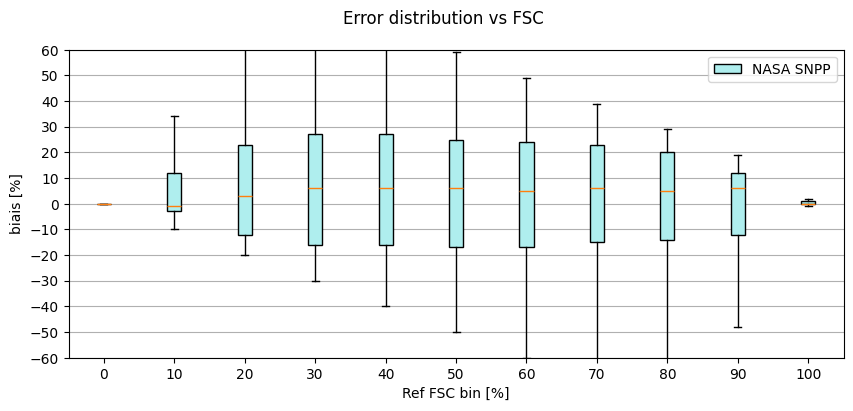

In [80]:
from products.plot_settings import NASA_L3_SNPP_VAR_NAME
import xarray as xr
from postprocess.error_distribution import raw_error_boxplots
from xarray.groupers import BinGrouper
import matplotlib.pyplot as  plt
import numpy as np

analysis_folder='/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_6/analyses/scatter'
scatter = xr.open_dataset(f"{analysis_folder}/scatter_WY_2023_2024_nasa_l3_snpp_vs_s2_theia.nc")

ref_bins_resampling = BinGrouper(np.array([-1,*np.arange(0, 100, 10),100]),
            labels=np.array([*np.arange(0, 100, 10),100]),)

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle(f"Error distribution vs FSC")
ax.set_xticklabels(ref_bins_resampling.labels)
ax.set_xlabel("Ref FSC bin [%]")
ax.set_ylabel("biais [%]")
ax.set_ylim(-60, 60)
ax.set_yticks(np.arange(-60,61,10))


# scatter = scatter.isel(time=1).sum(dim=('forest_mask_bins', 'sub_roi_bins', 'aspect_bins'))
def scatter_to_biais(dataset: xr.Dataset)->xr.DataArray:
    data_array = dataset.data_vars['n_occurrences'].sum(dim=('forest_mask_bins', 'sub_roi_bins', 'aspect_bins','time'))
    biais_bins = np.arange(-100,101)
    
    occurrences_per_biais_bins = np.zeros_like(biais_bins)
    for i,b in enumerate(biais_bins):
        occurrences_per_biais_bins[i] = np.trace(data_array.values, offset=b+ data_array.ref_bins.values[0])
    out_data_array = xr.DataArray(data=occurrences_per_biais_bins, coords={'biais_bins':biais_bins})
    # out_data_array = out_data_array.where(1- np.isnan(out_data_array), 0)
    return xr.Dataset({'n_occurrences':out_data_array})


# scatter = scatter.groupby('test_bins').map()
reduced = scatter.sel(time=slice('2023-12','2024-03')).groupby(ref_bins=ref_bins_resampling).map(scatter_to_biais)
# scatter = scatter.assign()
# scatter
d = {NASA_L3_SNPP_VAR_NAME: reduced}
raw_error_boxplots(metrics_dict=d, analysis_var="ref_bins_bins", ax=ax)

In [81]:
from postprocess.error_distribution import histograms_to_biais_rmse
reduced.groupby('ref_bins_bins').map(histograms_to_biais_rmse)

<xarray.Dataset> Size: 352B
Dimensions:         (ref_bins_bins: 11)
Coordinates:
  * ref_bins_bins   (ref_bins_bins) int64 88B 0 10 20 30 40 50 60 70 80 90 100
Data variables:
    biais           (ref_bins_bins) float64 88B 0.4771 6.775 ... -2.772 -2.604
    rmse            (ref_bins_bins) float64 88B 3.546 18.64 ... 22.58 12.14
    unbiaised_rmse  (ref_bins_bins) float64 88B 3.514 17.36 ... 22.41 11.85

In [82]:
import xarray as xr
from reductions.uncertainty import UncertaintyNASA
from reductions.statistics_base import EvaluationConfig
analysis_folder='/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_6/time_series'


un = UncertaintyNASA()
nasa = xr.open_dataset(f"{analysis_folder}/WY_2023_2024_nasa_l3_snpp.nc").sel(time=slice('2023-12','2024-03'))
s2 = xr.open_dataset(f"{analysis_folder}/WY_2023_2024_s2_theia.nc").sel(time=slice('2023-12','2024-03'))
config = EvaluationConfig(ref_fsc_step=10, sensor_zenith_analysis=False)
results = un.uncertainty_analysis(test_time_series=nasa, ref_time_series=s2, config=config)

INFO:logger:Processing time of the year 2023-12-02
INFO:logger:Processing time of the year 2023-12-03
INFO:logger:No intersection found on this day. Returning a zeros array.
INFO:logger:Processing time of the year 2023-12-04
INFO:logger:Processing time of the year 2023-12-05
INFO:logger:No intersection found on this day. Returning a zeros array.
INFO:logger:Processing time of the year 2023-12-06
INFO:logger:Processing time of the year 2023-12-07
INFO:logger:Processing time of the year 2023-12-09
INFO:logger:Processing time of the year 2023-12-10
INFO:logger:Processing time of the year 2023-12-13
INFO:logger:Processing time of the year 2023-12-14
INFO:logger:Processing time of the year 2023-12-15
INFO:logger:Processing time of the year 2023-12-16
INFO:logger:Processing time of the year 2023-12-17
INFO:logger:Processing time of the year 2023-12-18
INFO:logger:Processing time of the year 2023-12-19
INFO:logger:Processing time of the year 2023-12-20
INFO:logger:Processing time of the year 

In [86]:
from postprocess.error_distribution import histograms_to_biais_rmse
xr.Dataset({"n_occurrences":results}).groupby('ref_bins').map(histograms_to_biais_rmse)

<xarray.Dataset> Size: 384B
Dimensions:         (ref_bins: 12)
Coordinates:
  * ref_bins        (ref_bins) int64 96B 0 10 20 30 40 50 60 70 80 90 100 255
Data variables:
    biais           (ref_bins) float64 96B 0.4748 6.767 8.43 ... -2.562 nan
    rmse            (ref_bins) float64 96B 3.535 18.63 25.2 ... 22.49 12.07 nan
    unbiaised_rmse  (ref_bins) float64 96B 3.503 17.36 23.75 ... 22.34 11.8 nan

/tmp/ipykernel_46521/918842789.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ref_bins_resampling.labels)


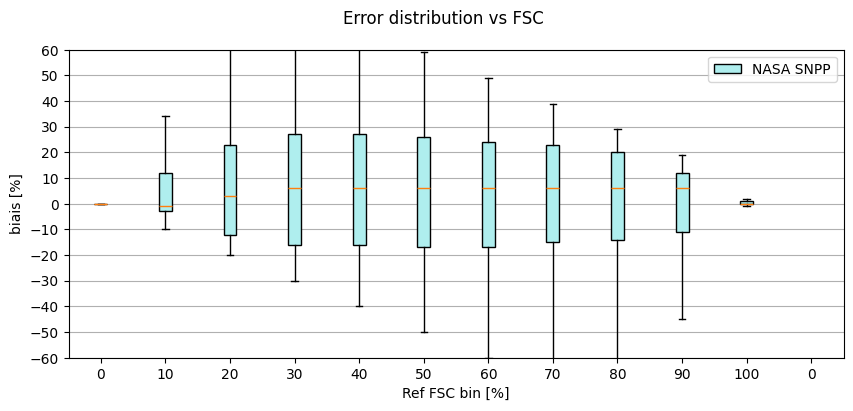

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle(f"Error distribution vs FSC")
ax.set_xticklabels(ref_bins_resampling.labels)
ax.set_xlabel("Ref FSC bin [%]")
ax.set_ylabel("biais [%]")
ax.set_ylim(-60, 60)
ax.set_yticks(np.arange(-60,61,10))
d = {NASA_L3_SNPP_VAR_NAME: xr.Dataset({"n_occurrences":results})}
raw_error_boxplots(metrics_dict=d, analysis_var="ref_bins", ax=ax)

In [ ]:
import xarray as xr

working_folder = "/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_6/"
period = slice('2023-12-01', '2023-12-31')
fore = 'forest'

s2_fsc = xr.open_dataset(
        f"{working_folder}/time_series/WY_2023_2024_s2_theia.nc",
        decode_cf=True,
    ).sel(time=period)

mf_modifed_unc = xr.open_dataset(f"{working_folder}/analyses/uncertainty/uncertainty_WY_2023_2024_meteofrance_modified_no_forest.nc",decode_cf=True,).sel(time=period)
nasa_unc = xr.open_dataset(f"{working_folder}/analyses/uncertainty/uncertainty_WY_2023_2024_nasa_l3.nc",decode_cf=True,).sel(time=period)
mf_modified_new = xr.open_dataset(
        f"{working_folder.replace('version_6', 'version_6_new_threshold')}/time_series/WY_2023_2024_meteofrance_modified_no_forest.nc",
        decode_cf=True,
    ).sel(time=period)


<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


FileNotFoundError: [Errno 2] No such file or directory: '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_6/analuses_uncertainty/uncertainty_WY_2023_2024_meteofrance_modified_no_forest.nc'

In [ ]:
from reductions.statistics_base import EvaluationConfig
from reductions.uncertainty import UncertaintyNASA, UncertaintyMeteoFrance
config_eval = EvaluationConfig(
    ref_fsc_step=99,
    sensor_zenith_analysis=False,
    forest_mask_path="/home/imperatoren/work/VIIRS_S2_comparison/data/auxiliary/forest_mask/corine_2006_forest_mask_utm.tif",
    sub_roi_mask_path=None,
    slope_map_path=None,
    aspect_map_path=None,
    dem_path=None,
)


metrics_calculator = UncertaintyMeteoFrance()
new_metrics = metrics_calculator.uncertainty_analysis(test_time_series=mf_modified_new, ref_time_series=s2_fsc, config=config_eval)

In [ ]:
import pandas as pd
from postprocess.error_distribution import fancy_table_error_distribution, histograms_to_biais_rmse
from products.plot_settings import PRODUCT_PLOT_NAMES



reduced_datasets = []
for dataset in [nasa_unc.sel(forest_mask_bins=fore),mf_modifed_unc.sel(forest_mask_bins=fore)]#, xr.Dataset({new_metrics.name:new_metrics.sel(forest_mask_bins=fore)})]:
    reduced_datasets.append(histograms_to_biais_rmse(dataset))
concatenated = xr.concat(reduced_datasets, pd.Index(['old', 'new'], name="product"), coords="minimal")
reduced_df = concatenated.to_dataframe().reset_index('product')
fancy_table_error_distribution(reduced_df)